## CIFAR-100 - Representations from ResNet-18

In [12]:
from fenec import FeNeC
from feloc import FeLoC
from kmeans import KMeans
import utils
import metrics

In [13]:
device = utils.get_device()

Device used: cuda


### Sample run

Using FeNeC:

In [14]:
# Define the Classifier metric and the KMeans metric
metric = metrics.MahalanobisMetric(shrinkage=2, gamma_1=0.9, gamma_2=0.9, normalization=True)
metric_kmeans = metrics.EuclideanMetric()

# Initialize KMeans and FeNeC
kmeans = KMeans(n_clusters=47, metric=metric_kmeans)
clf = FeNeC(n_neighbors=2,
            metric=metric,
            data_normalization=False,
            tukey_lambda=0.4,
            kmeans=kmeans,
            device=device)

# Run the classifier on the dataset
_ = utils.train(clf=clf, folder_name='../data/dataset2', n_tasks=6, only_last=False, verbose=1)

|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|      0 |          50 | 84.00%      | 83.76%   |     0.84 |       0.84 | 100.00%            |
task 0: (time: 9.9074s)
FeCAM accuracy: 83.5600; My accuracy: 83.7600
|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|      0 |          50 | 84.52%      | 78.70%   |     0.81 |       0.79 | 77.55%             |
|      1 |          10 | 48.64%      | 62.50%   |     0.54 |       0.62 | 22.45%             |
task 1: (time: 3.8045s)
FeCAM accuracy: 76.5167; My accuracy: 76.0000
|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|    

Using FeLoC:

In [15]:
# Define the Classifier metric and the KMeans metric
metric = metrics.MahalanobisMetric(shrinkage=2, gamma_1=1.1, gamma_2=1.9, normalization=True)
metric_kmeans = metrics.EuclideanMetric()

# Initialize KMeans and FeLoC
kmeans = KMeans(n_clusters=45, metric=metric_kmeans)
clf = FeLoC(metric=metric,
            kmeans=kmeans,
            data_normalization=False,
            device=device,
            tukey_lambda=0.4,
            batch_size=8,
            optimizer="SGD",
            n_points=2,
            mode=0,
            num_epochs=200,
            lr=0.003,
            early_stop_patience=10,
            reg_type=None,
            reg_lambda=None,
            normalization_type=None,
            tanh_x=None,
            centroids_new_old_ratio=None,
            train_only_on_first_task=True,
            dataloader_batch_size=64)

# Run the classifier on the dataset
_ = utils.train(clf=clf, folder_name='../data/dataset2', n_tasks=6, only_last=False, verbose=1)

Dataloader created
Validation Accuracy after Epoch [1/200]: 100.00%, Loss = 2.0065,
Validation Accuracy after Epoch [11/200]: 100.00%, Loss = 0.2018,
Validation Accuracy after Epoch [21/200]: 100.00%, Loss = 0.0983,
Validation Accuracy after Epoch [31/200]: 100.00%, Loss = 0.0654,
Validation Accuracy after Epoch [41/200]: 100.00%, Loss = 0.0494,
Validation Accuracy after Epoch [51/200]: 100.00%, Loss = 0.0399,
Validation Accuracy after Epoch [61/200]: 100.00%, Loss = 0.0336,
Validation Accuracy after Epoch [71/200]: 100.00%, Loss = 0.0291,
Validation Accuracy after Epoch [81/200]: 100.00%, Loss = 0.0257,
Validation Accuracy after Epoch [91/200]: 100.00%, Loss = 0.0231,
Validation Accuracy after Epoch [101/200]: 100.00%, Loss = 0.0210,
Validation Accuracy after Epoch [111/200]: 100.00%, Loss = 0.0192,
Validation Accuracy after Epoch [121/200]: 100.00%, Loss = 0.0178,
Validation Accuracy after Epoch [131/200]: 100.00%, Loss = 0.0166,
Validation Accuracy after Epoch [141/200]: 100.00%, Lo

## Grid search results - plot hyperparameters

In [14]:
study_name = "GridSearch_FeNeC_CIFAR_ResNet"

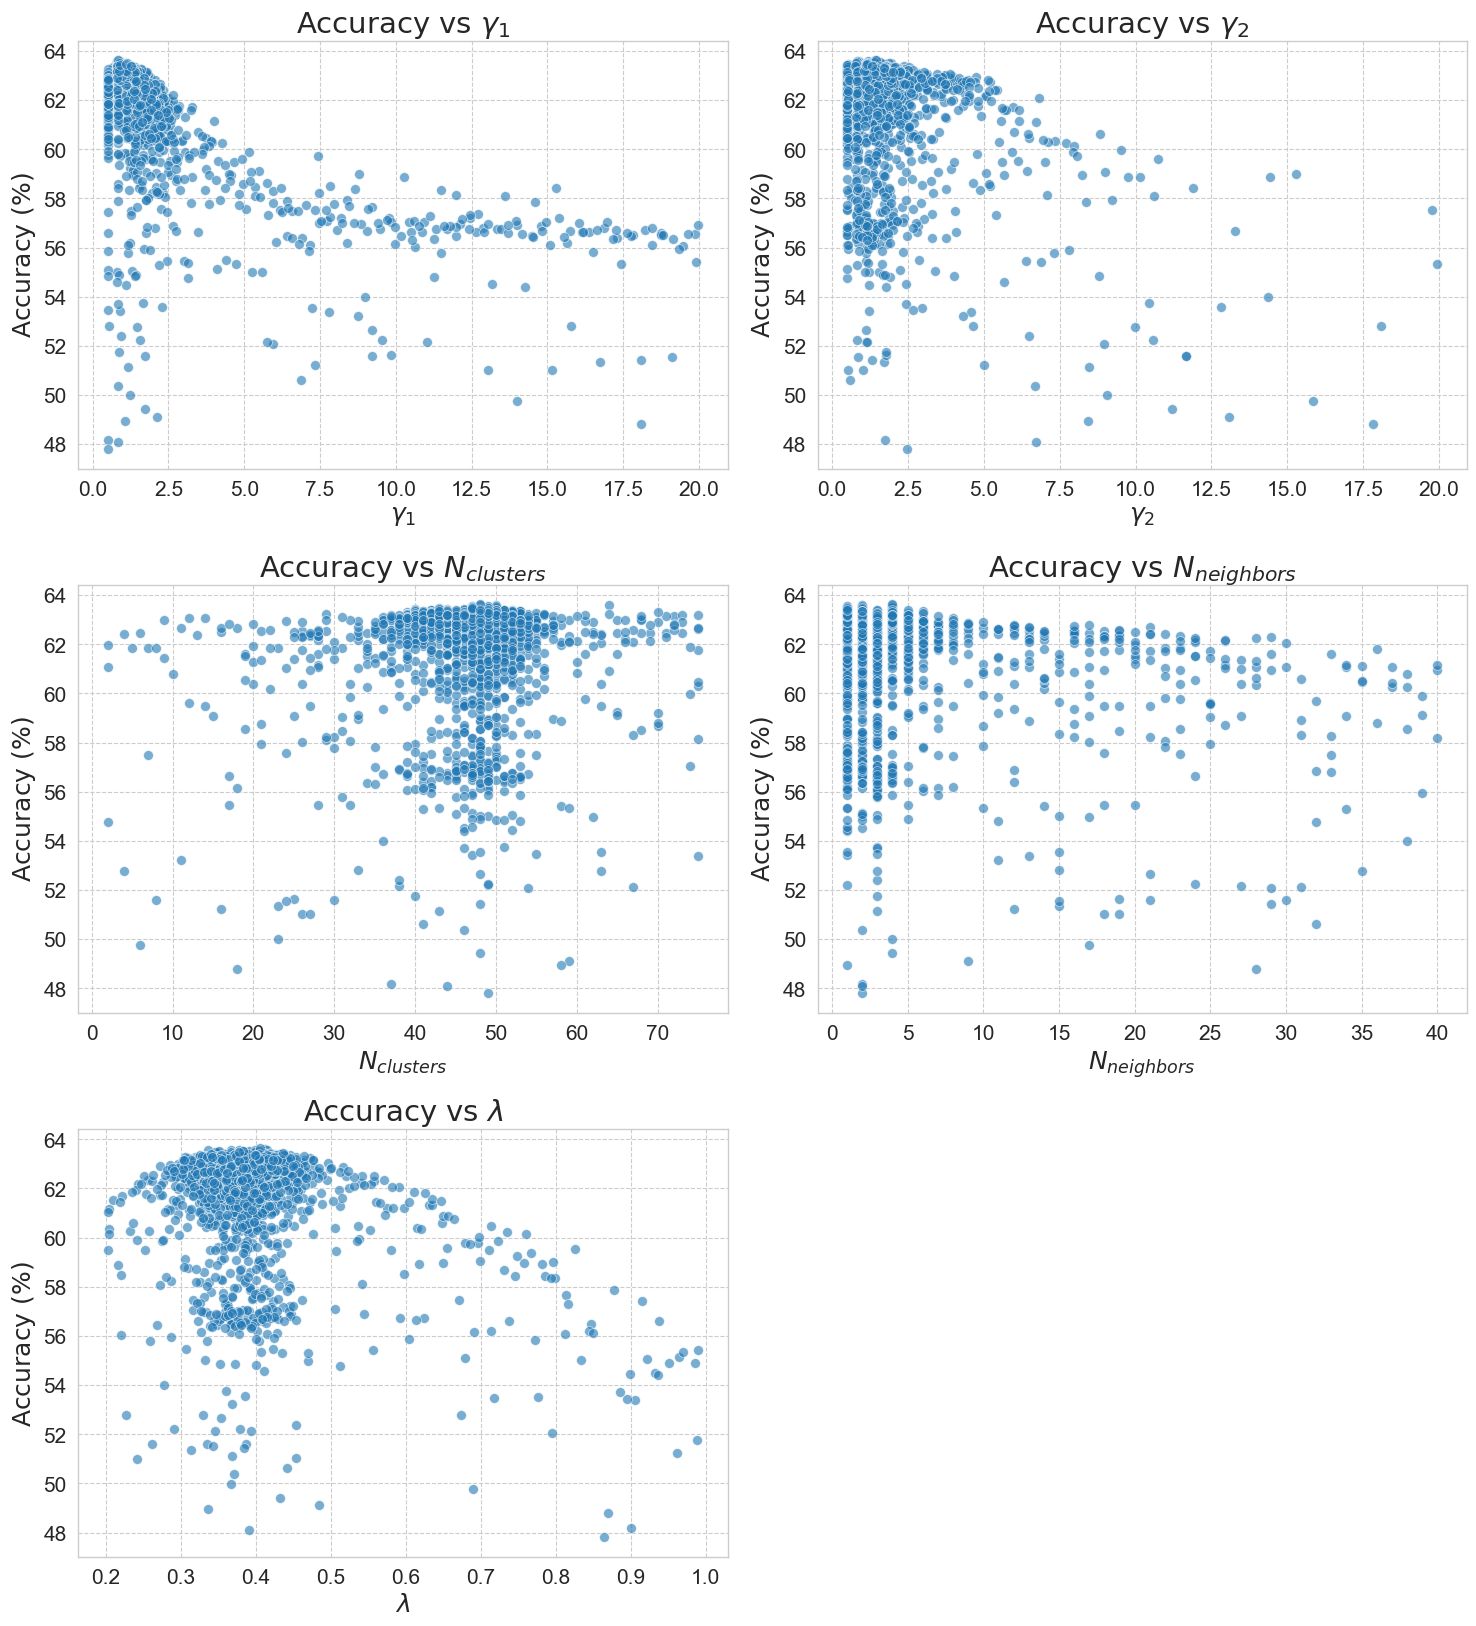

In [17]:
utils.plot_params_accuracy(study_name=study_name, path='../results/final/', ylim=True, only_later=None, columns=2)

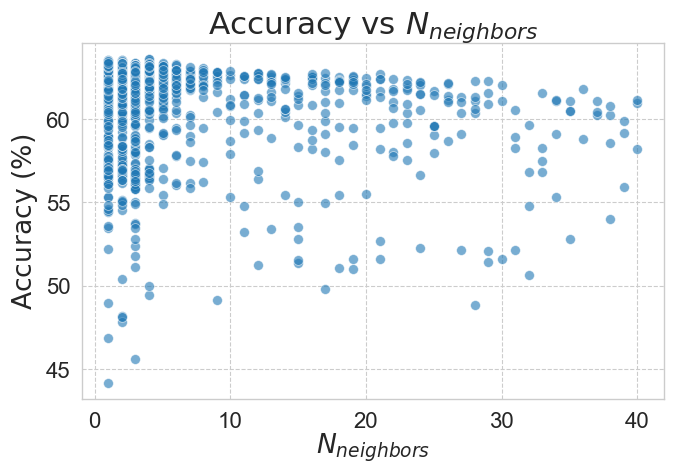

In [19]:
# Load data and extract names
df = utils.load_from_csv(study_name=study_name, path='../results/final/')

name = "FeNeC_ResNet_CIFAR"
param_name = "n_neighbors"

accuracies = df['value'].values
param_vals = df[f'params_{param_name}'].values
path_to_pdf = f"plots/{name}_acc_vs_{param_name}.pdf"
title = utils.format_param_accuracy_title(param_name)

utils.plot_param_accuracy(param_name=param_name, param_vals=param_vals, accuracies=accuracies, ylim=True, 
                               ylim_set=44, xlim_set=None, only_later=0, fig_size=(7, 5), font_scale=1.6,
                               title_pad=7, label_pad=0, title=title, path_to_pdf=path_to_pdf)

Colorful plots

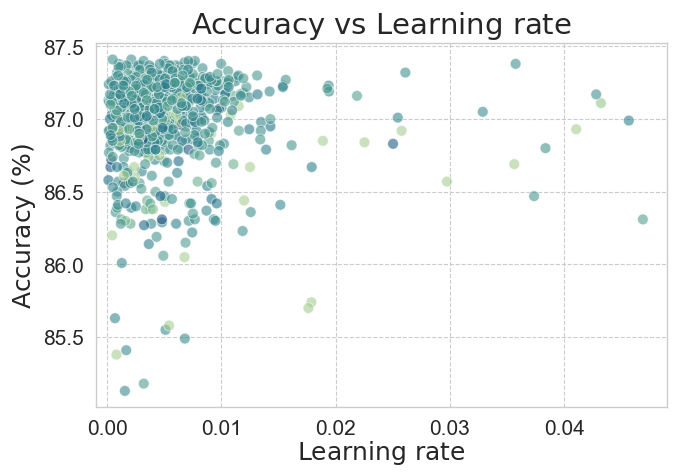

In [66]:
import utils

study_name = "Dataset1GradKNNFinalSearchFinalFinal"
name = "FeLoC_ViT_CIFAR" #"FeNeC_ResNet_ImageNet_Subset"
x_name, y_name, hue_name = "lr", "accuracy", "n_clusters"

df = utils.load_from_csv(study_name=study_name, path='../results/final/')
path_to_pdf = f"plots/{name}_{y_name}_vs_{x_name}.pdf"

utils.plot_acc_param_hue(df, x_name, y_name, hue_name, 
                         ylim=True, ylim_set=85.1, xlim_set=(-0.001, 0.049), only_later=None,
                         s_plot=60, alpha_plot=0.6,
                         palette='crest', show_bar=False, bar_lim=(40, None),
                         title_pad=7, label_pad=0, font_scale=1.5,  
                         fig_size=(7, 5), path_to_pdf=path_to_pdf) # mako, rocket_r, flare, crest_r

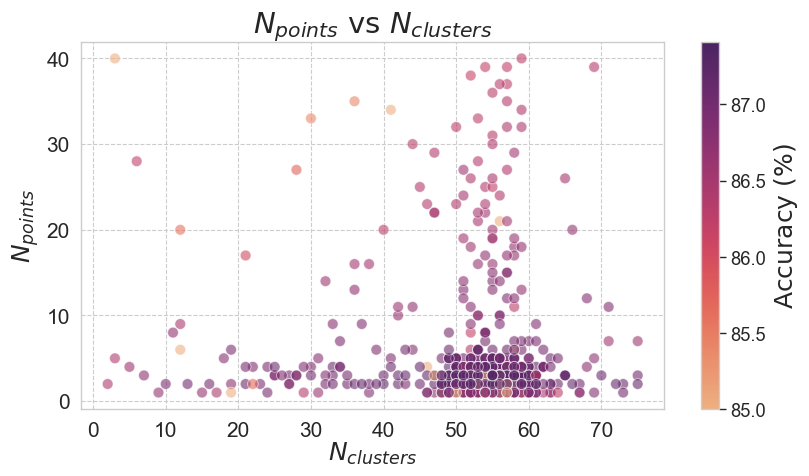

In [67]:
import utils

study_name = "Dataset1GradKNNFinalSearchFinalFinal"
name = "FeLoC_ViT_CIFAR" #"FeNeC_ResNet_ImageNet_Subset"
x_name, y_name, hue_name = "n_clusters", "n_points", "accuracy"

df = utils.load_from_csv(study_name=study_name, path='../results/final/')
path_to_pdf = f"plots/{name}_{y_name}_vs_{x_name}.pdf"

utils.plot_acc_param_hue(df, x_name, y_name, hue_name, 
                         ylim=False, ylim_set=None, xlim_set=None, only_later=None,
                         s_plot=60, alpha_plot=0.6,
                         palette='flare', show_bar=True, bar_lim=(85, None),
                         title_pad=7, label_pad=0, font_scale=1.5,
                         fig_size=(7, 5), path_to_pdf=path_to_pdf) # mako, rocket_r, flare, crest_r